# Top2vec Topic Modeling Approach

### About Top2Vec
Top2Vec is an algorithm for topic modeling and semantic search. It automatically detects topics present in text and generates jointly embedded topic, document and word vectors. Once you train the Top2Vec model you can:

    Get number of detected topics.
    Get topics.
    Get topic sizes.
    Get hierarchichal topics.
    Search topics by keywords.
    Search documents by topic.
    Search documents by keywords.
    Find similar words.
    Find similar documents.
    Expose model with RESTful-Top2Vec
    See the paper for more details on how it works.

### How does it work?
The assumption the algorithm makes is that many semantically similar documents are indicative of an underlying topic. The first step is to create a joint embedding of document and word vectors. Once documents and words are embedded in a vector space the goal of the algorithm is to find dense clusters of documents, then identify which words attracted those documents together. Each dense area is a topic and the words that attracted the documents to the dense area are the topic words.

### Benefits
    Automatically finds number of topics.
    No stop word lists required.
    No need for stemming/lemmatization.
    Works on short text.
    Creates jointly embedded topic, document, and word vectors.
    Has search functions built in.
    
Ref : https://github.com/ddangelov/Top2Vec

In [2]:
# Importing the libraries
from top2vec import Top2Vec
import re
import numpy as np
import pandas as pd
from pprint import pprint
import time
from tqdm import tqdm

In [3]:
# read the input
df = pd.read_csv("data/Train.csv")

In [5]:
# convert text into list(required format for training)
text = df.ABSTRACT.values.tolist()

## Pre-Processing(Optional)
### Sincce top2vec is contextualized topic modeling technique, it doesn't need any preprocessing

In [6]:
# remove numbers spaces

text_step1 = []
with tqdm(total=len(text)) as pbar:
    for i in range(0, len(text)):
        review = re.sub("\d+", "", str(text[i]))
        text_step1.append(review)
        pbar.update(1)
text = text_step1  # re-assigning
del text_step1

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14004/14004 [00:00<00:00, 18103.61it/s]


In [7]:
# remove junks

text_step2 = []
with tqdm(total=len(text)) as pbar:
    for i in range(0, len(text)):
        review = re.sub(r"\W", " ", str(text[i]))
        review = review.lower()
        review = re.sub(r"\s+[a-z]\s+", " ", review)
        review = re.sub(r"^[a-z]\s+", " ", review)
        review = re.sub(r"\d+", " ", review)
        review = re.sub(r"\s+", " ", review)
        text_step2.append(review)
        pbar.update(1)

text = text_step2  # re-assigning
del text_step2

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14004/14004 [00:08<00:00, 1659.42it/s]


In [8]:
df['clean_text'] = text # Incase you want to update the results also

## Model Training
### Please refer https://github.com/ddangelov/Top2Vec for hyper-parameter tuning

In [9]:
model = Top2Vec(text, speed="learn")

2021-12-29 15:27:57,091 - top2vec - INFO - Pre-processing documents for training
2021-12-29 15:28:13,207 - top2vec - INFO - Creating joint document/word embedding
2021-12-29 15:35:39,221 - top2vec - INFO - Creating lower dimension embedding of documents
2021-12-29 15:37:24,890 - top2vec - INFO - Finding dense areas of documents
2021-12-29 15:37:26,157 - top2vec - INFO - Finding topics


### Get number of topics
this will return the number of topics that Top2Vec has found in the data.

In [11]:
num_of_topics = model.get_num_topics()
print(num_of_topics)

68


### Get Topic Sizes
### This will return the number of documents most similar to each topic. Topics are in decreasing order of size.
### Returns:

topic_sizes: The number of documents most similar to each topic.

topic_nums: The unique index of every topic will be returned.

In [14]:
# Topic nums and size
topic_sizes, topic_nums = model.get_topic_sizes()
print("topic numbers : ", topic_nums)
print("topic sizes : ", topic_sizes)

topic numbers :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67]
topic sizes :  [2087 1711 1480  558  499  454  375  357  351  311  261  232  227  224
  211  173  173  169  160  140  138  137  129  129  126  124  122  121
  119  113  113  111  111  106   96   94   89   87   86   85   84   78
   76   75   71   69   67   66   65   62   60   59   58   58   58   57
   54   54   53   51   51   50   48   47   40   35   35   34]


### Get Topics
This will return the topics in decreasing size.

### Returns:

topic_words: For each topic the top 50 words are returned, in order of semantic similarity to topic.

word_scores: For each topic the cosine similarity scores of the top 50 words to the topic are returned.

topic_nums: The unique index of every topic will be returned.

In [17]:
#This will return the topics in decreasing size.
topic_words, word_scores, topic_nums = model.get_topics(num_of_topics)
print("topic words : ", topic_words)

topic words :  [['elliptic' 'manifolds' 'cohomology' ... 'u_' 'polynomials' 'nabla']
 ['spin' 'superconducting' 'superconductors' ... 'neel' 'pseudogap'
  'kondo']
 ['stellar' 'galaxy' 'galaxies' ... 'spectroscopic' 'milky' 'orbiting']
 ...
 ['eeg' 'brain' 'subjects' ... 'autoencoder' 'extraction' 'trial']
 ['quantile' 'regression' 'covariates' ... 'fuzzy' 'modelling'
  'electricity']
 ['bp' 'message' 'passing' ... 'autoencoders' 'greedy' 'bond']]


### Search Topic
We are going to search for topics most similar topics quantam physics
### Returns:

topic_words: For each topic the top 50 words are returned, in order of semantic similarity to topic.

word_scores: For each topic the cosine similarity scores of the top 50 words to the topic are returned.

topic_scores: For each topic the cosine similarity to the search keywords will be returned.

topic_nums: The unique index of every topic will be returned.

In [20]:
##We are going to search for topics most similar topics physics
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["physics"], num_topics=5)
print(topic_nums)

[ 1 22 67 37  2]


### Similar Keywords
Search for similar words to physics.

In [26]:
words, word_scores = model.similar_words(keywords=["physics"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

physical 0.4860115256806312
here 0.4794726061470612
energy 0.4760901876615866
new 0.47585963010893667
interactions 0.4600613660262142
matter 0.4567367038335393
potential 0.45544843947147445
inside 0.4521904289384097
of 0.4486833801965104
well 0.4449546945099125
properties 0.4417659896137804
considering 0.43984995379436753
these 0.4394853557450732
and 0.43833969440211473
materials 0.4380556510913229
exotic 0.4356558871588173
theory 0.433711197566754
direct 0.4334704399805536
condensed 0.43160730467233943
discuss 0.43120365969743757


## Topic Visualization with Keywords Search

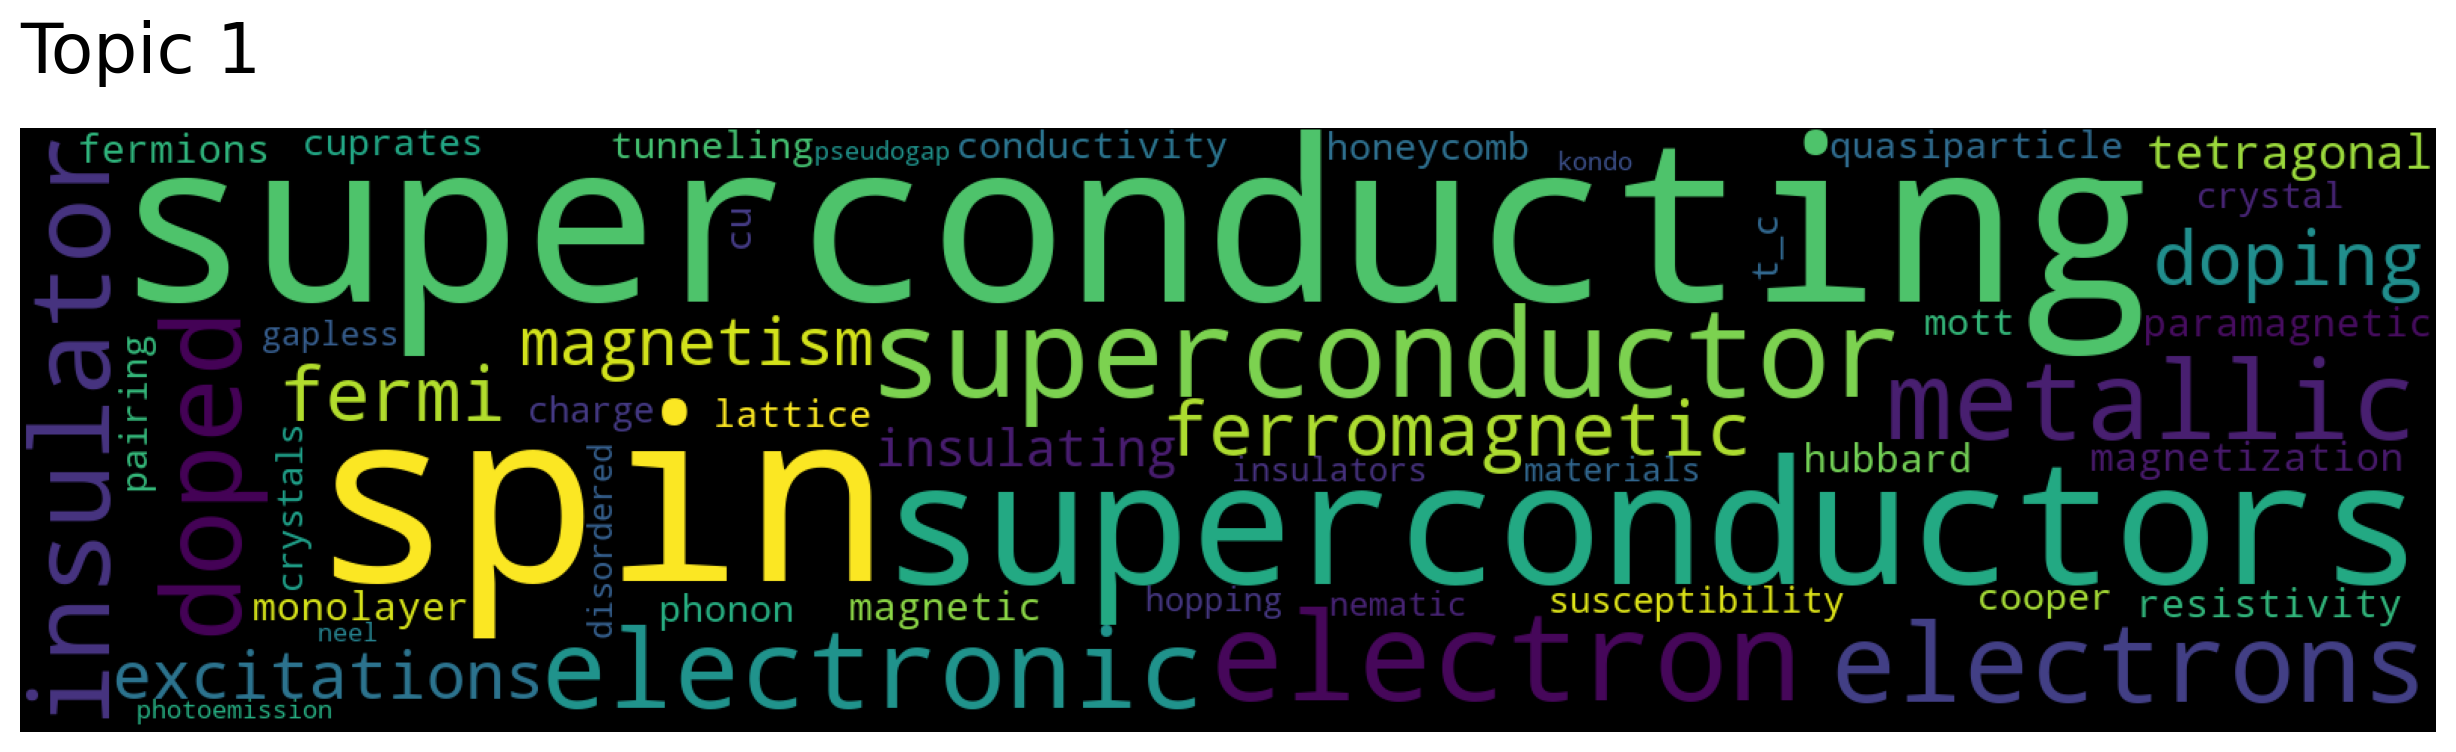

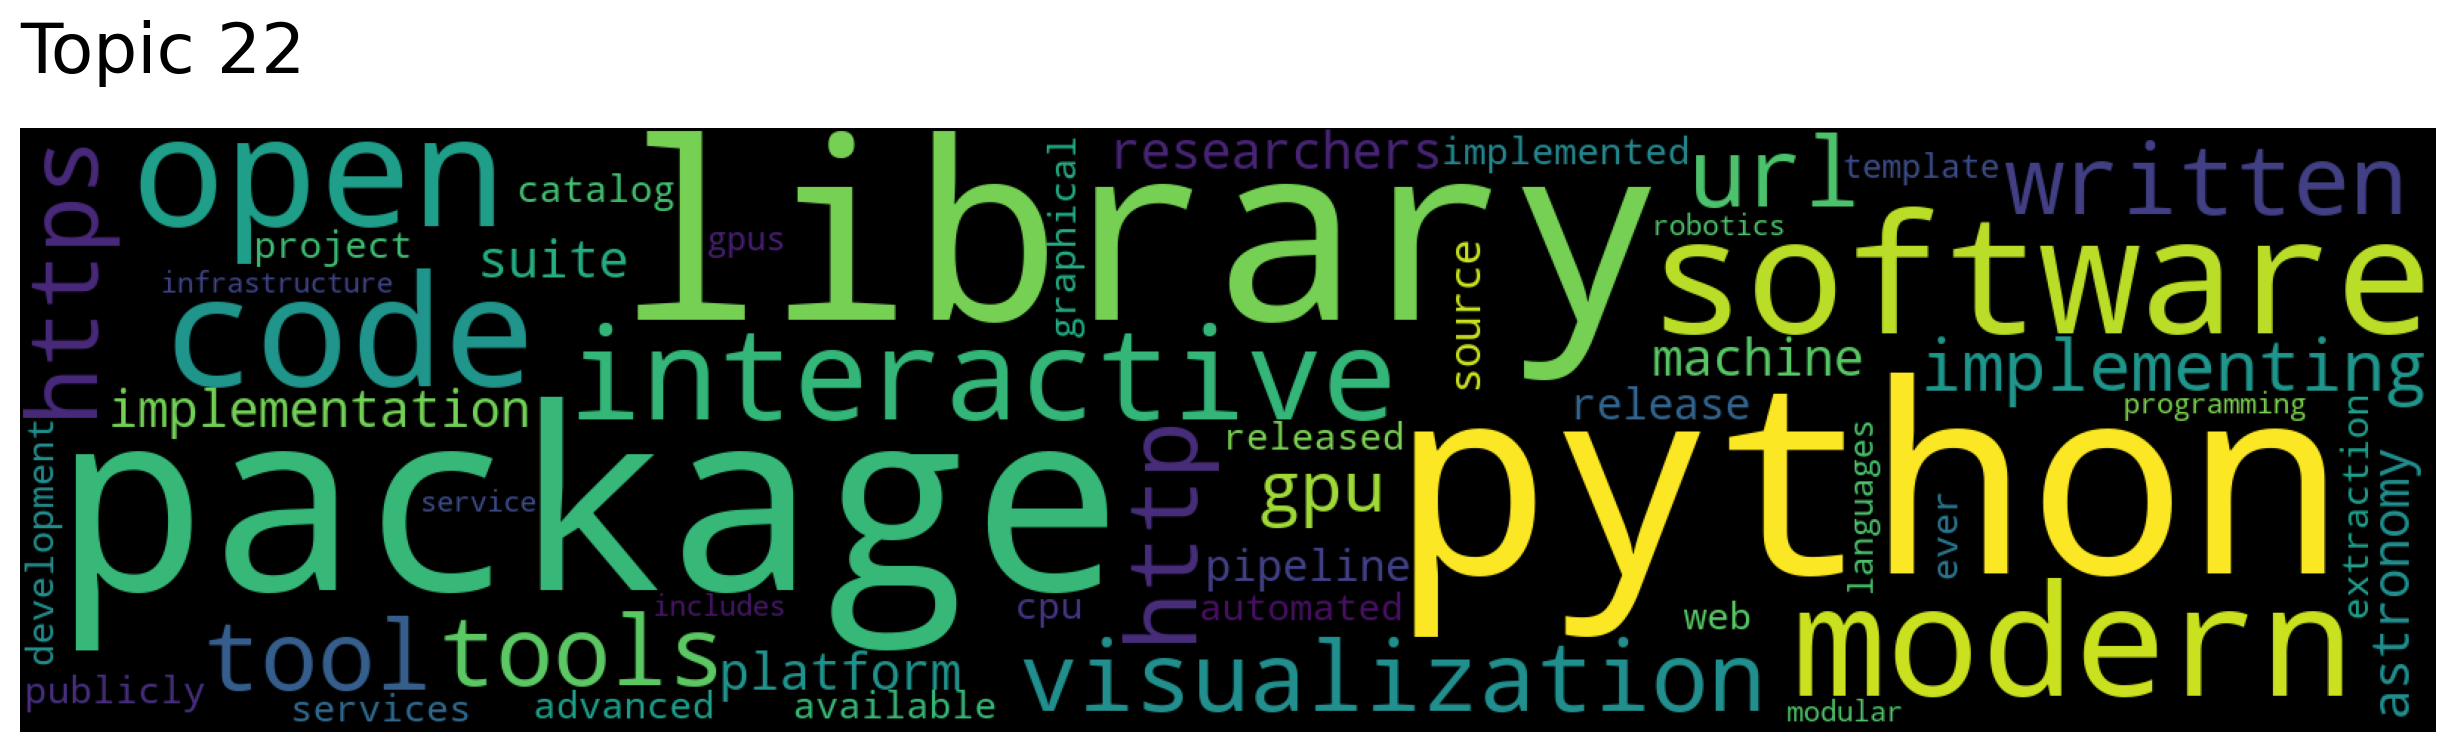

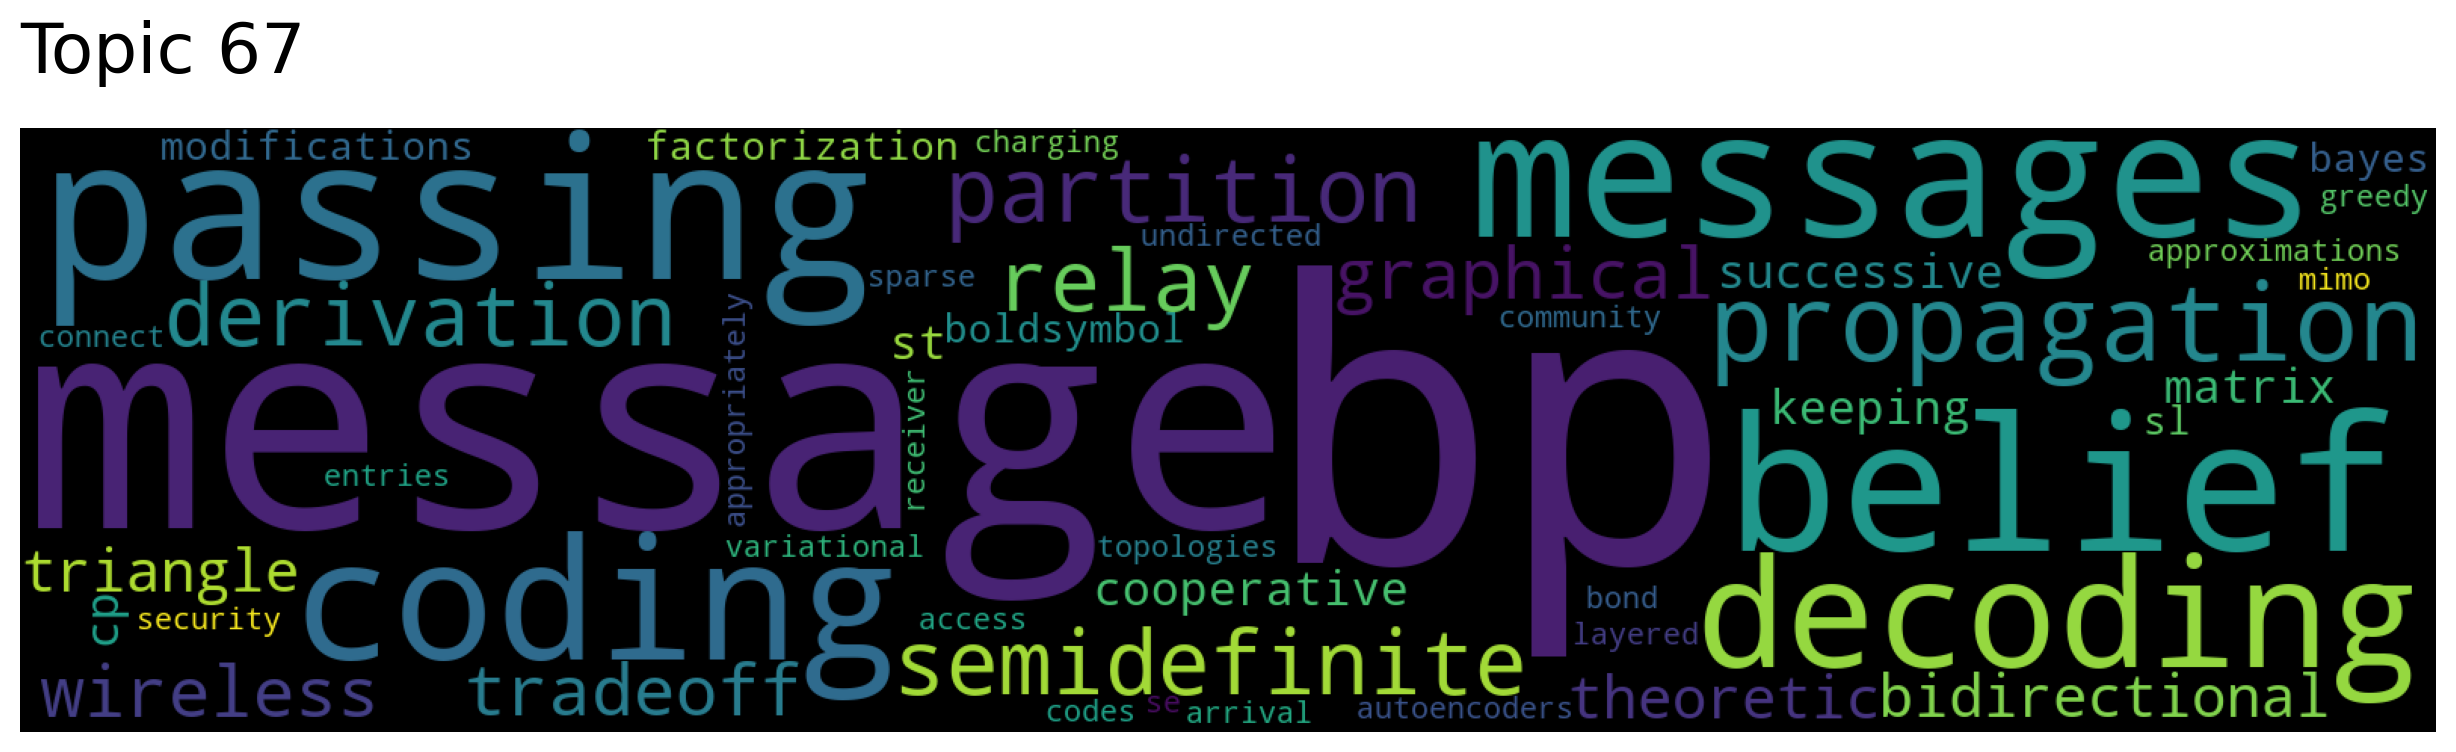

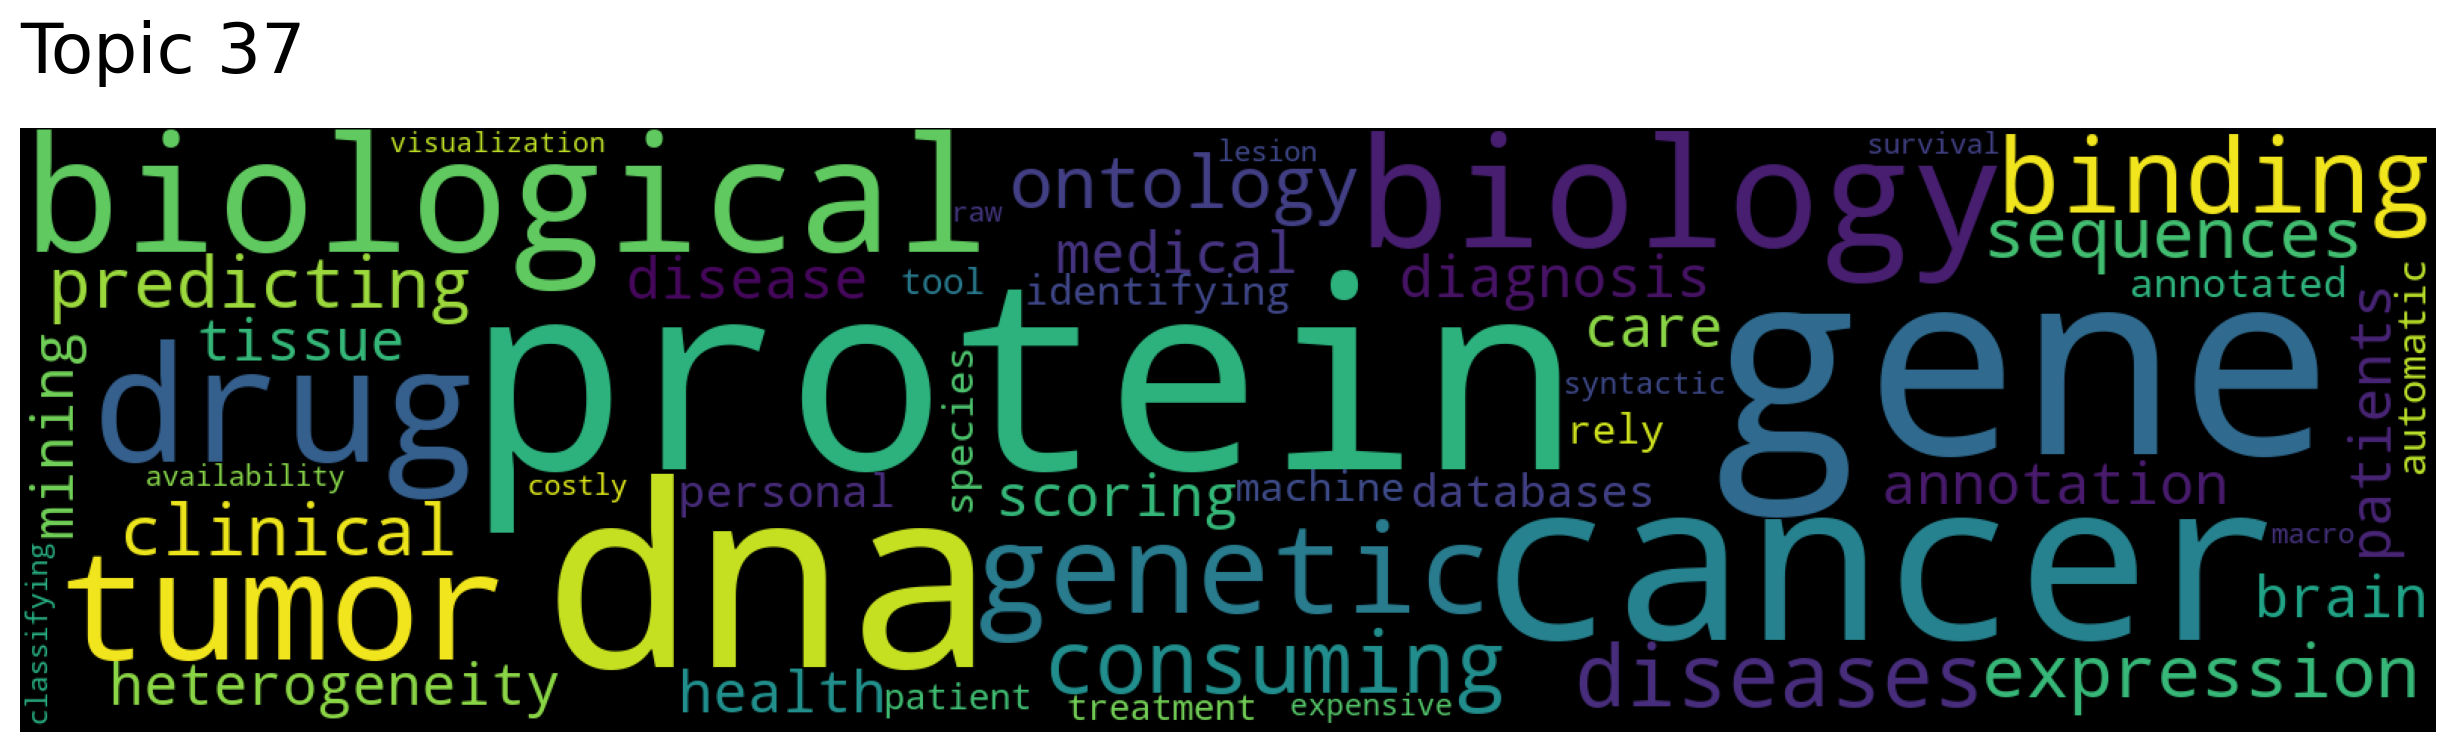

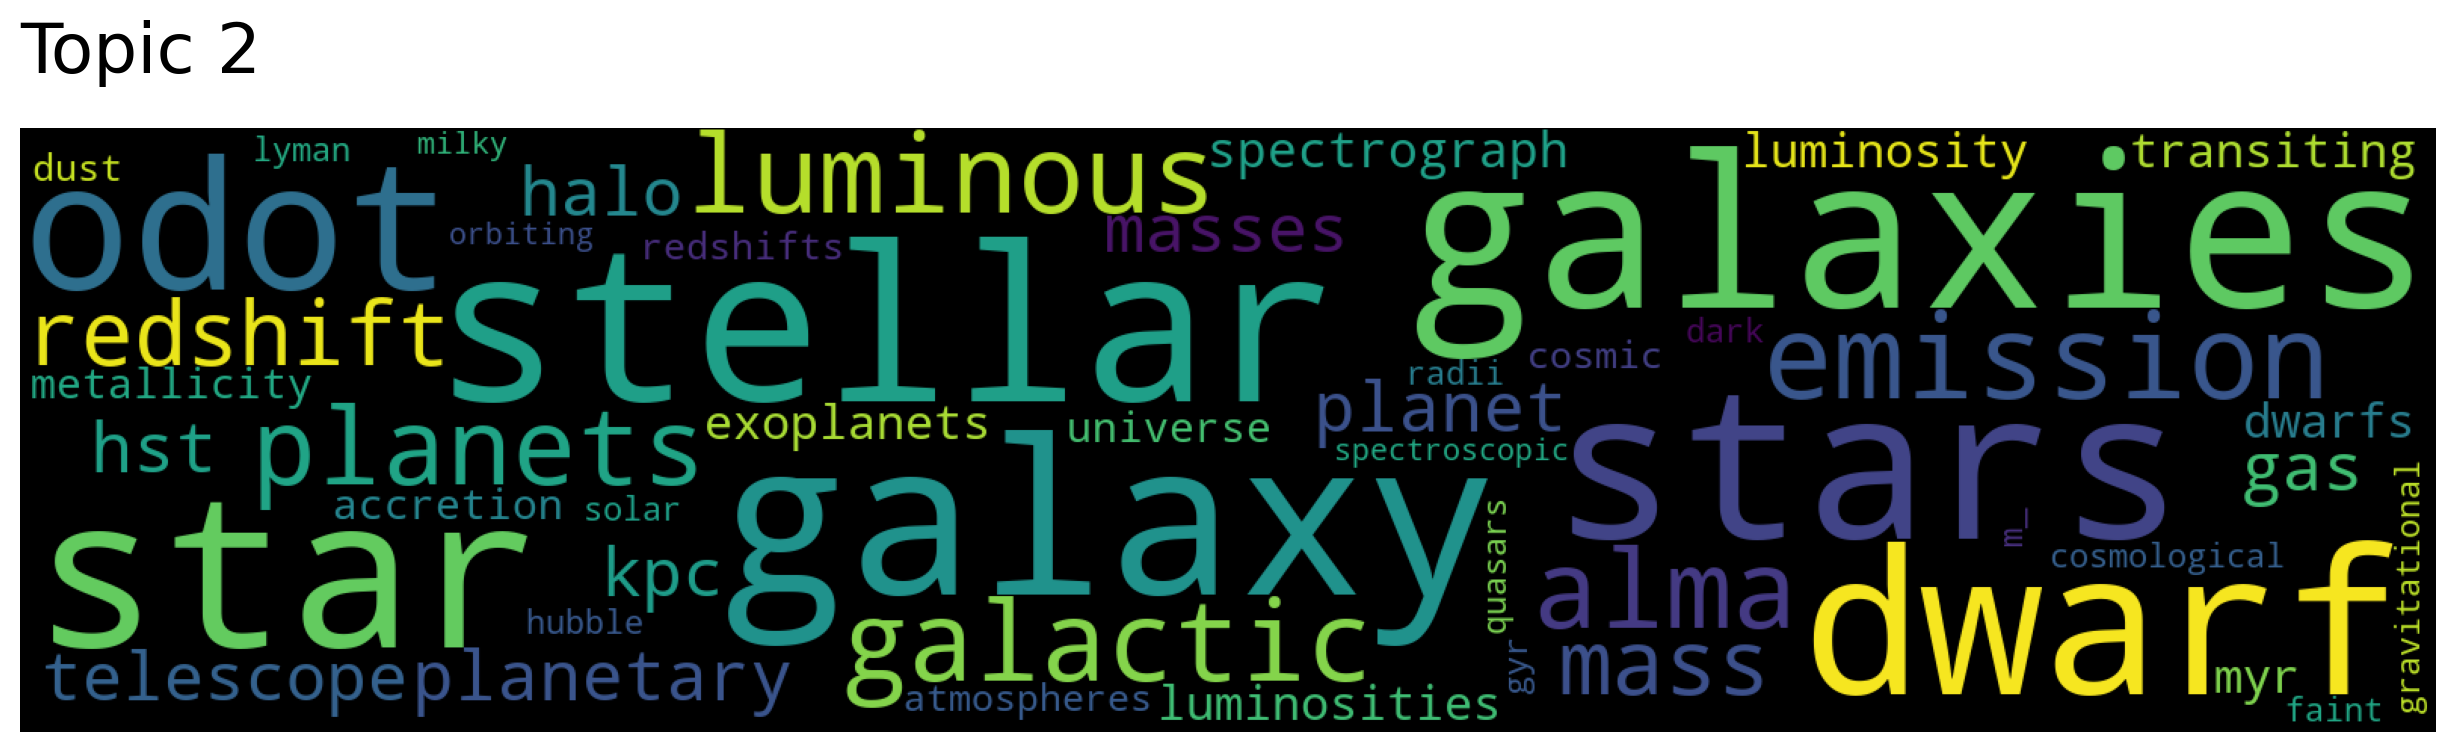

In [22]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["physics"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

### Save the model

In [23]:
# model.save("./models/top2vec_model")

In [103]:
# model = Top2Vec.load("./models/top2vec_model") # Load the model